In [1]:
#用深层神经网络实现二分类图像识别

In [3]:
#导入相关模块
import numpy as np
import matplotlib.pyplot as plt
import h5py

In [2]:
#使用L层神经网络，最后一层使用sigmoid函数，之前使用relu函数

In [23]:
#使用两层神经网络，使用relu函数和sigmoid函数，第一层n_h节点
def init_paramters_deep(Layer_dims):
    paramters = {}
    for i in range(1,len(Layer_dims)):
        paramters['W'+str(i)] = np.random.rand(Layer_dims[i],Layer_dims[i-1])*0.01
        paramters['b'+str(i)] = np.zeros((Layer_dims[i],1))
    return paramters

In [4]:
#定义激活函数
def activation(x,activate):
    if(activate=='relu'):
        return (abs(x)+x)/2
    if(activate=='sigmoid'):
        return 1/(1+np.exp(-x))

In [33]:
#进行前向传播
def forward(X,paramters):
    cache = {}
    a = X
    cache['A0']=X
    length = len(paramters)//2+1
    for i in range(1,length):
        W = paramters['W'+str(i)]
        b = paramters['b'+str(i)]
        Z = np.dot(W,a)+b
        cache['Z'+str(i)] = Z
        if(i!=length-1):
            a = activation(Z,'relu')
        else:
            a = activation(Z,'sigmoid')
        cache['A'+str(i)] = a
    return cache

In [7]:
#计算损失函数
def computeCost(A,Y):
    return (-1/A.shape[1])*np.nansum((Y*np.log(A))+(1-Y)*np.log(1-A))

In [31]:
#进行反向传播计算
def backward(X,caches,Y,paramters):
    m = Y.shape[1]
    length = len(paramters)//2+1
    grads={}
    dZ = caches['A'+str(length-1)]-Y
    for i in reversed(range(1,length)):
        w = paramters['W'+str(i)]
        a_prev = caches['A'+str(i-1)]
        dw = (1/m)*np.dot(dZ,a_prev.T)
        db = (1/m)*np.sum(dZ,axis=1,keepdims=True)
        da_prev = np.dot(w.T,dZ)
        dZ = np.multiply(da_prev, np.int64(a_prev > 0))
        grads['dW'+str(i)] = dw
        grads['db'+str(i)] = db
    return grads

In [11]:
def update_paramters(paramters,grads,learning_rate):
    length = len(paramters)//2+1
    for i in range(1,length):
        paramters['W'+str(i)] = paramters['W'+str(i)]-learning_rate*grads['dW'+str(i)]
        paramters['b'+str(i)] = paramters['b'+str(i)]-learning_rate*grads['db'+str(i)]
    return paramters

In [12]:
def predict(X,y,paramters):
    caches = forward(X,paramters)
    length = len(paramters)//2
    a = caches['A'+str(length)]
    y_prediction = np.zeros((1,y.shape[1]))
    for i in range(y.shape[1]):
        if(a[0,i]>=0.5):
            y_prediction[0,i] = 1
        else:
            y_prediction[0,i] = 0
    return y_prediction

In [14]:
#建立浅层神经网络模型
def nn_model(X,Y,learning_rate,iterations,layer_dims):
    losses = []
    paramters = init_paramters_deep(layer_dims)
    length = len(layer_dims)
    for i in range(iterations):
        caches = forward(X,paramters)
        cost = computeCost(caches['A'+str(length-1)],Y)
        grads = backward(X,caches,Y,paramters)
        paramters  = update_paramters(paramters,grads,learning_rate)
        losses.append(cost)
        if(i%100==0):
            print(cost)
    return paramters,losses

In [15]:
f = h5py.File(r"C:\Users\alex\Desktop\train_catvnoncat.h5",'r')

In [16]:
train_set_ori_x = np.array(f['train_set_x'][:])
train_set_ori_y = np.array(f['train_set_y'][:])

In [17]:
f = h5py.File(r"C:\Users\alex\Desktop\test_catvnoncat.h5",'r')

In [18]:
test_set_ori_x = np.array(f['test_set_x'][:])
test_set_ori_y = np.array(f['test_set_y'][:])

In [19]:
train_set_x = train_set_ori_x.reshape(train_set_ori_x.shape[0],-1).T
train_set_y = train_set_ori_y.reshape(1,-1)
test_set_x=test_set_ori_x.reshape(test_set_ori_x.shape[0],-1).T
test_set_y = test_set_ori_y.reshape(1,-1)

In [20]:
train_set_x = train_set_x/255
m = train_set_y.shape[1]
test_set_x = test_set_x/255

In [43]:
layer_dims = [train_set_x.shape[0],4,2,1]

In [51]:
paramters,losses=nn_model(train_set_x,train_set_y,0.005,3000,layer_dims)

0.8228966324691482
0.7110359593902498
0.6618398653210446
0.6535660726740364
0.6516981122167977
0.6499625535361245
0.6465142566979067
0.6424246072038912
0.6337576904026093
0.6128072466817166
0.5858814197756337
0.5549481537833856
0.521816013517155
0.48743937485427896
0.4529266808437174
0.4189400048847439
0.3858073872940726
0.35378869390378764
0.3229951105997929
0.29326397932761994
0.2641445053100255
0.23488674360076586
0.20430460115023497
0.17088112416943071
0.13874754142372728
0.11869915464103324
0.10531629505578152
0.09404593394307506
0.08432017721871123
0.07591459458546482


In [52]:
print(paramters)

{'W1': array([[ 0.00203212,  0.00973785,  0.00759412, ...,  0.00155505,
         0.01589943, -0.00073817],
       [-0.00681171,  0.02219576,  0.00886221, ...,  0.0104867 ,
         0.01981471, -0.01667363],
       [ 0.00741829, -0.01136251, -0.0063522 , ...,  0.00203142,
        -0.01290087,  0.01541243],
       [ 0.00966089, -0.01002128, -0.00075109, ...,  0.00249649,
        -0.00731451,  0.01451967]]), 'b1': array([[-2.89450825e-03],
       [-2.28999450e-05],
       [-9.52563045e-03],
       [-8.43253069e-03]]), 'W2': array([[-0.51573297, -1.08030554,  0.84413368,  0.62502777]]), 'b2': array([[-0.0929672]])}


In [53]:
y_prediction_train = predict(train_set_x,train_set_y,paramters)
y_prediction_test = predict(test_set_x,test_set_y,paramters)
print('train accuracy: {} %'.format(100-np.mean(np.abs(y_prediction_train-train_set_y))*100))
print('test accuracy: {} %'.format(100-np.mean(np.abs(y_prediction_test-test_set_y))*100))

train accuracy: 99.52153110047847 %
test accuracy: 66.0 %


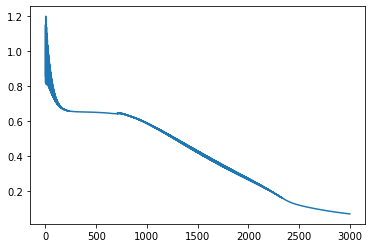

In [54]:
plt.plot(losses)